# 🧪 Proyecto Final - Predicción de Ventas con Machine Learning

### 👩🏽‍💻 Autora: Mirlenis Tovar  
### 🏭 Industria: Farmacéutica / Comercial  
### 📅 Periodo Analizado: 2022–2024  

---

## 🎯 Abstracto

Este proyecto busca predecir el monto de ventas neto por cliente, producto y zona, utilizando datos históricos de ventas. Esta información permite anticipar ingresos y optimizar recursos logísticos y comerciales.  
La audiencia incluye a líderes de ventas, analistas comerciales y áreas de planificación de la demanda.

---

## ❓ Problema a Resolver

**¿Podemos predecir el `IMPORTE_VENDIDO_NETO` de una venta futura utilizando variables como cliente, producto, ubicación, tipo de cliente y vendedor?**

📌 Tipo de problema: **Regresión**



In [1]:
from google.colab import files
uploaded = files.upload()

Saving VENTA 2022-2024.xlsx to VENTA 2022-2024.xlsx


In [2]:
import pandas as pd

df = pd.read_excel('VENTA 2022-2024.xlsx', engine='openpyxl')

# Ver las primeras filas
df.head()

,Fecha.Año,Fecha.Mes,Fecha.Día,COD_ARTICULO,ART_NOMBRE,COD_CLIENTE,CLIE_NOMBRE,COD_CLIENTE_CONS,CLIE_CONS_NOMBRE,Unidad NO Homogénea,...,IMPORTE_VENDIDO_NETO,FAMILIA,Vendedor Cli,Nombre Vendedor Cli,PROVINCIA,LOCALIDAD,UN_NEGOCIO,DIVISION,Vendedor Cpte,Nombre Vendedor Cpte
0,2024,Enero,4,23401001,AEROPIEL AEROSOL x 255g,102850,102850-DROGUERIA DEL SUD-ALLEN,102853,DROGUERIA DEL SUD-CABA,-18,...,-37298.16,AEROP,301,Cucchi,RIO NEGRO,ALLEN,1,1,NaN,NaN
1,2024,Enero,4,23401001,AEROPIEL AEROSOL x 255g,104114,104114-SUIZA DROG-S MIGUEL DE TUCUMAN,104114,SUIZA DROG-S MIGUEL DE TUCUMAN,-4,...,-10834.76,AEROP,301,Cucchi,TUCUMAN,SAN MIGUEL DE TUCUMAN,1,1,NaN,NaN
2,2024,Enero,4,40301001,CEFAGRAND 500mg 16 Comp,102850,102850-DROGUERIA DEL SUD-ALLEN,102853,DROGUERIA DEL SUD-CABA,-1,...,-1964.66,CEFAG,301,Cucchi,RIO NEGRO,ALLEN,1,1,NaN,NaN
3,2024,Enero,4,40301001,CEFAGRAND 500mg 16 Comp,102851,102851-DROGUERIA DEL SUD-BAHIA BLANCA,102853,DROGUERIA DEL SUD-CABA,-40,...,-78586.40,CEFAG,301,Cucchi,BUENOS AIRES,BAHIA BLANCA,1,1,NaN,NaN
4,2024,Enero,4,40401001,CIAPAR 500mg x 10 Comp.,102850,102850-DROGUERIA DEL SUD-ALLEN,102853,DROGUERIA DEL SUD-CABA,-2,...,-3703.70,CIAPA,301,Cucchi,RIO NEGRO,ALLEN,1,1,NaN,NaN


In [3]:
# Ver estructura de columnas y tipos de datos
df.info()

# Ver cantidad de valores nulos por columna
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348607 entries, 0 to 348606
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Fecha.Año             348607 non-null  int64  
 1   Fecha.Mes             348607 non-null  object 
 2   Fecha.Día             348607 non-null  int64  
 3   COD_ARTICULO          348607 non-null  object 
 4   ART_NOMBRE            348607 non-null  object 
 5   COD_CLIENTE           348607 non-null  int64  
 6   CLIE_NOMBRE           348607 non-null  object 
 7   COD_CLIENTE_CONS      348607 non-null  int64  
 8   CLIE_CONS_NOMBRE      348607 non-null  object 
 9   Unidad NO Homogénea   348607 non-null  int64  
 10  Unidad Homogénea      348607 non-null  int64  
 11  Cod_Tipo_Cliente      348607 non-null  int64  
 12  Tipo Cliente          348607 non-null  object 
 13  Cod_Ramo              348607 non-null  object 
 14  Ramo                  348607 non-null  object 
 15  

,0
Nombre Vendedor Cpte,348607
Vendedor Cpte,348607
LOCALIDAD,117
Fecha.Mes,0
ART_NOMBRE,0
COD_CLIENTE,0
Fecha.Día,0
COD_ARTICULO,0
Fecha.Año,0
CLIE_CONS_NOMBRE,0


In [4]:
df.head()

,Fecha.Año,Fecha.Mes,Fecha.Día,COD_ARTICULO,ART_NOMBRE,COD_CLIENTE,CLIE_NOMBRE,COD_CLIENTE_CONS,CLIE_CONS_NOMBRE,Unidad NO Homogénea,...,IMPORTE_VENDIDO_NETO,FAMILIA,Vendedor Cli,Nombre Vendedor Cli,PROVINCIA,LOCALIDAD,UN_NEGOCIO,DIVISION,Vendedor Cpte,Nombre Vendedor Cpte
0,2024,Enero,4,23401001,AEROPIEL AEROSOL x 255g,102850,102850-DROGUERIA DEL SUD-ALLEN,102853,DROGUERIA DEL SUD-CABA,-18,...,-37298.16,AEROP,301,Cucchi,RIO NEGRO,ALLEN,1,1,NaN,NaN
1,2024,Enero,4,23401001,AEROPIEL AEROSOL x 255g,104114,104114-SUIZA DROG-S MIGUEL DE TUCUMAN,104114,SUIZA DROG-S MIGUEL DE TUCUMAN,-4,...,-10834.76,AEROP,301,Cucchi,TUCUMAN,SAN MIGUEL DE TUCUMAN,1,1,NaN,NaN
2,2024,Enero,4,40301001,CEFAGRAND 500mg 16 Comp,102850,102850-DROGUERIA DEL SUD-ALLEN,102853,DROGUERIA DEL SUD-CABA,-1,...,-1964.66,CEFAG,301,Cucchi,RIO NEGRO,ALLEN,1,1,NaN,NaN
3,2024,Enero,4,40301001,CEFAGRAND 500mg 16 Comp,102851,102851-DROGUERIA DEL SUD-BAHIA BLANCA,102853,DROGUERIA DEL SUD-CABA,-40,...,-78586.40,CEFAG,301,Cucchi,BUENOS AIRES,BAHIA BLANCA,1,1,NaN,NaN
4,2024,Enero,4,40401001,CIAPAR 500mg x 10 Comp.,102850,102850-DROGUERIA DEL SUD-ALLEN,102853,DROGUERIA DEL SUD-CABA,-2,...,-3703.70,CIAPA,301,Cucchi,RIO NEGRO,ALLEN,1,1,NaN,NaN


In [5]:
# Convertimos Fecha.Mes a número
meses = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5,
    'Junio': 6, 'Julio': 7, 'Agosto': 8, 'Septiembre': 9,
    'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}
df['Fecha.Mes'] = df['Fecha.Mes'].map(meses)

# Eliminamos columnas vacías o redundantes
df = df.drop([
    'CLIE_CONS_NOMBRE',
    'CLIE_NOMBRE',
    'ART_NOMBRE',
    'Nombre Vendedor Cli',
    'Nombre Vendedor Cpte',
    'COD_CLIENTE',
    'COD_ARTICULO',
    'Vendedor Cpte'
], axis=1)

# Rellenamos los pocos nulos en LOCALIDAD con "SIN DATOS"
df['LOCALIDAD'] = df['LOCALIDAD'].fillna('SIN DATOS')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348607 entries, 0 to 348606
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Fecha.Año             348607 non-null  int64  
 1   Fecha.Mes             348607 non-null  int64  
 2   Fecha.Día             348607 non-null  int64  
 3   COD_CLIENTE_CONS      348607 non-null  int64  
 4   Unidad NO Homogénea   348607 non-null  int64  
 5   Unidad Homogénea      348607 non-null  int64  
 6   Cod_Tipo_Cliente      348607 non-null  int64  
 7   Tipo Cliente          348607 non-null  object 
 8   Cod_Ramo              348607 non-null  object 
 9   Ramo                  348607 non-null  object 
 10  IMPORTE_VENDIDO_NETO  348607 non-null  float64
 11  FAMILIA               348607 non-null  object 
 12  Vendedor Cli          348607 non-null  int64  
 13  PROVINCIA             348607 non-null  object 
 14  LOCALIDAD             348607 non-null  object 
 15  

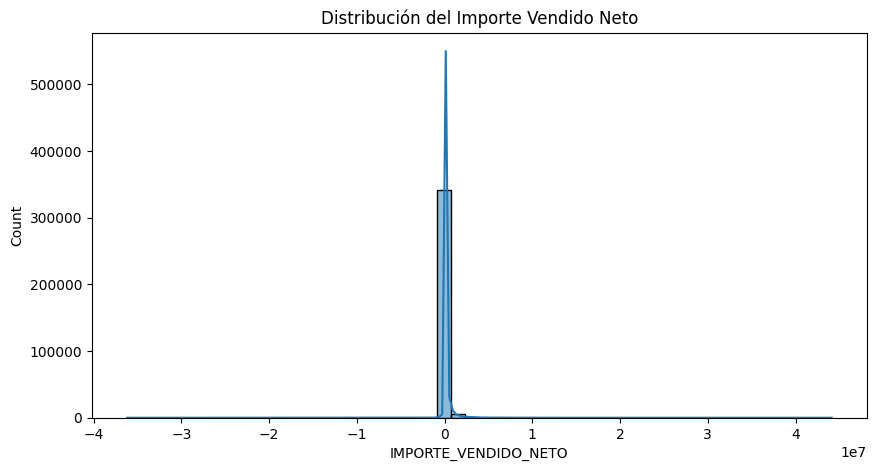

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df['IMPORTE_VENDIDO_NETO'], bins=50, kde=True)
plt.title("Distribución del Importe Vendido Neto")
plt.show()

In [8]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Tipo Cliente', 'Cod_Ramo', 'Ramo', 'FAMILIA', 'PROVINCIA',
       'LOCALIDAD'],
      dtype='object')

In [9]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [10]:
X = df_encoded.drop('IMPORTE_VENDIDO_NETO', axis=1)
y = df_encoded['IMPORTE_VENDIDO_NETO']

In [11]:
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (348607, 1003)
Shape de y: (348607,)


In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
rf = RandomForestRegressor(
    n_estimators=30,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Predicción y evaluación
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("📊 Random Forest (ajustado):")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)

📊 Random Forest (ajustado):
MAE: 33058.19465112075
RMSE: 173592.6767700363
R² Score: 0.8637397762942531


In [16]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predicción y evaluación
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("📊 XGBoost Results:")
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("R² Score:", r2_xgb)

📊 XGBoost Results:
MAE: 28970.725746252392
RMSE: 208873.57398592698
R² Score: 0.802724436072841


In [17]:
from sklearn.model_selection import RandomizedSearchCV

# modelo base
xgb_model = XGBRegressor(random_state=42)

# espacio de búsqueda
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# búsqueda aleatoria con validación cruzada
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Entrenamos
random_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("✅ Mejor Modelo XGBoost:")
print("MAE:", mae_best)
print("RMSE:", rmse_best)
print("R² Score:", r2_best)
print("\n🧠 Mejores parámetros encontrados:")
print(random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


✅ Mejor Modelo XGBoost:
MAE: 27945.833152058065
RMSE: 203619.52166864648
R² Score: 0.8125242397260353

🧠 Mejores parámetros encontrados:
{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [18]:
!pip install shap

import shap
shap.initjs()

In [19]:
# explainer para Random Forest
explainer = shap.TreeExplainer(rf)

# muestra para que no sea tan pesado
X_sample = X_train.sample(n=1000, random_state=42)

# valores SHAP
shap_values = explainer.shap_values(X_sample)

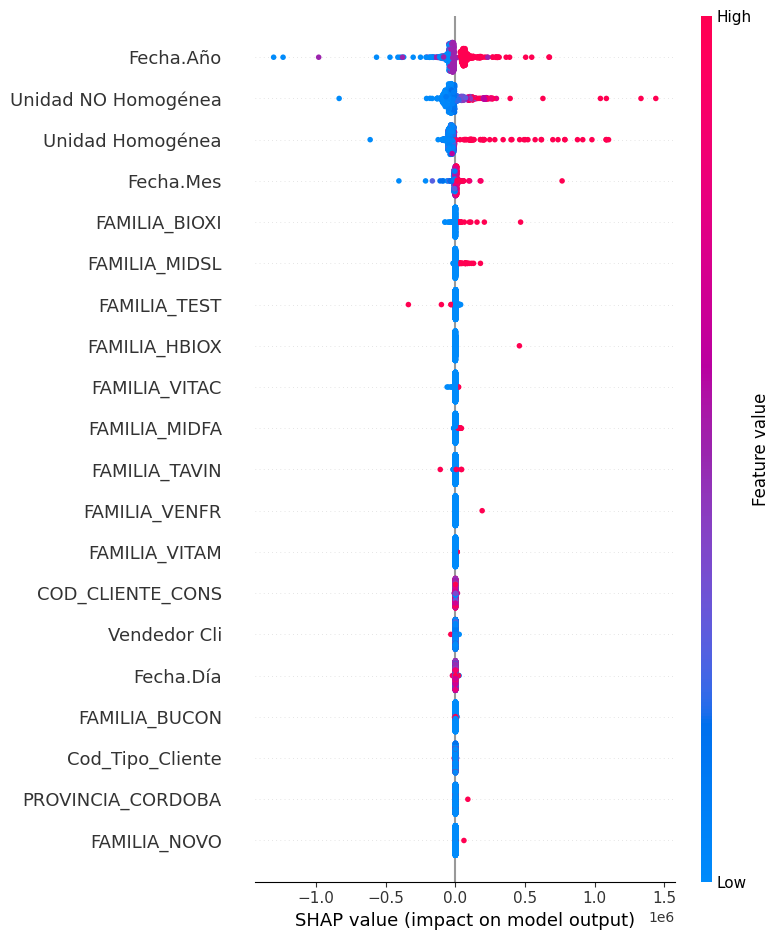

In [20]:
shap.summary_plot(shap_values, X_sample)

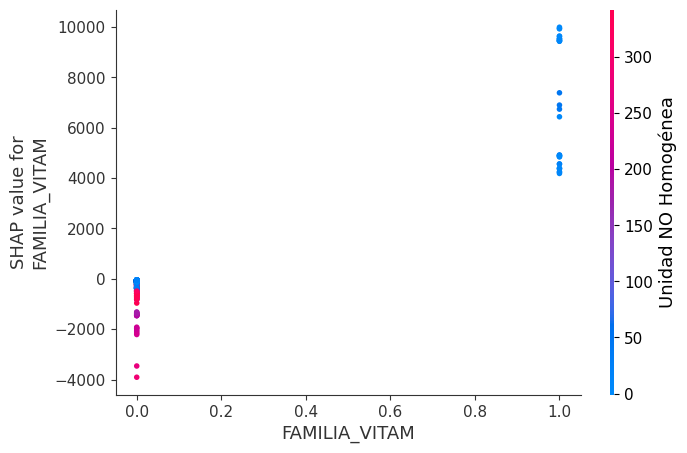

In [22]:
shap.dependence_plot('FAMILIA_VITAM', shap_values, X_sample)

#Bonus

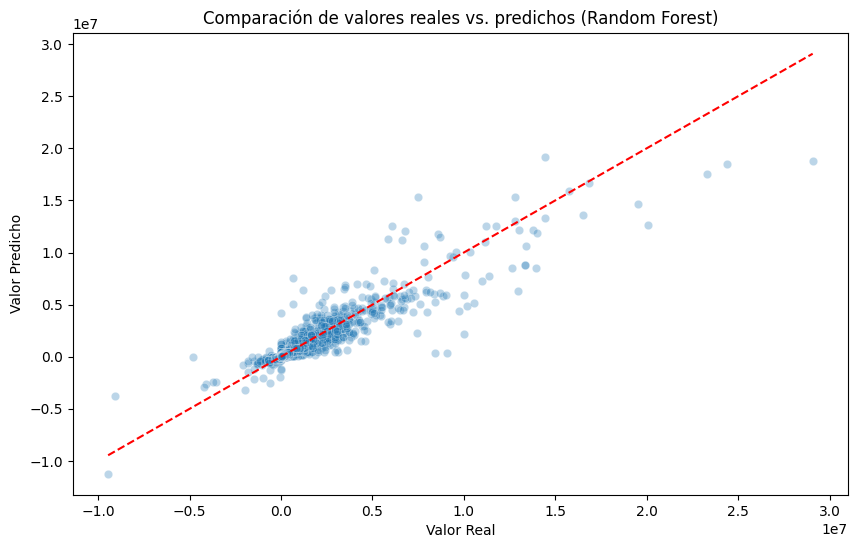

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Comparación de valores reales vs. predichos (Random Forest)")
plt.show()

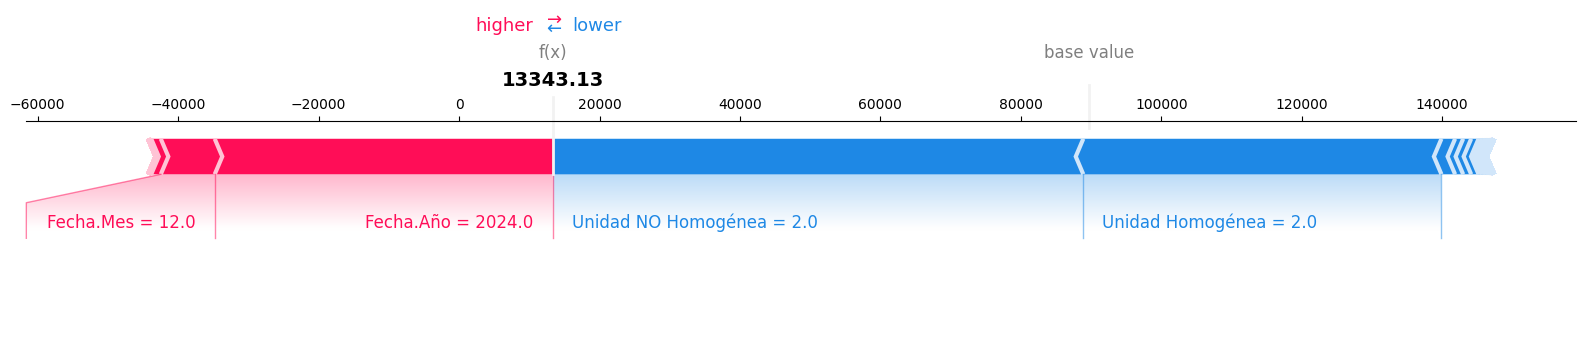

In [24]:
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    X_sample.iloc[0],
    matplotlib=True
)

In [26]:
# TEMPORADA
df['TEMPORADA'] = df['Fecha.Mes'].map({
    1:'Baja', 2:'Baja', 3:'Media', 4:'Media', 5:'Media', 6:'Alta',
    7:'Alta', 8:'Alta', 9:'Media', 10:'Media', 11:'Alta', 12:'Alta'
})

# CLIENTE RECURRENTE
df['CLIENTE_RECURRENTE'] = df.groupby('COD_CLIENTE_CONS')['Fecha.Año'].transform('nunique') > 1
df['CLIENTE_RECURRENTE'] = df['CLIENTE_RECURRENTE'].astype(int)

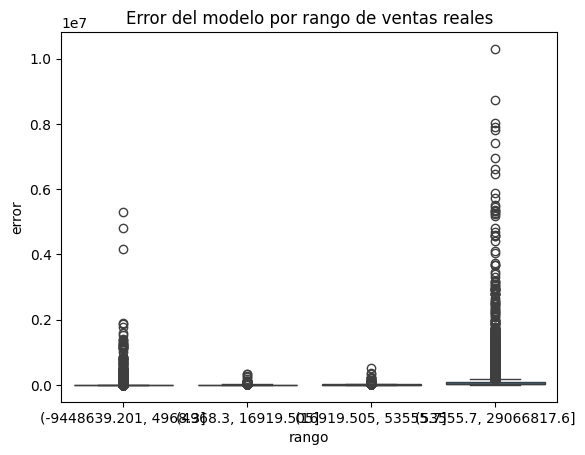

In [27]:
df_eval = pd.DataFrame({'real': y_test, 'pred': y_pred_rf})
df_eval['error'] = abs(df_eval['real'] - df_eval['pred'])
df_eval['rango'] = pd.qcut(df_eval['real'], q=4)

sns.boxplot(x='rango', y='error', data=df_eval)
plt.title("Error del modelo por rango de ventas reales")
plt.show()

# 📊 Proyecto Final: Predicción del Importe Vendido Neto con Machine Learning

### 👩🏽‍💻 Autora: Mirlenis Tovar  
### 🏭 Industria: Comercial / Farmacéutica  
### 📅 Período Analizado: 2022 - 2024  

---

## 🎯 Objetivo General

Utilizar modelos de Machine Learning para predecir el `IMPORTE_VENDIDO_NETO`, a partir de variables como cliente, producto, localización, tipo de cliente y estructura comercial.

---

## ❓ Problema planteado

**¿Podemos anticipar el monto neto vendido por operación, usando variables históricas y categóricas?**

Tipo de problema: **Regresión**

---

## 🧪 Proceso Realizado

1. **Carga y limpieza del dataset** con más de 348.000 registros (2022–2024)
2. **Eliminación de columnas vacías o redundantes**
3. **Transformación de variables categóricas** mediante One-Hot Encoding
4. **Modelado** con RandomForest y XGBoost
5. **Validación** con `train_test_split` y métricas MAE, RMSE y R²
6. **Optimización de hiperparámetros** con RandomizedSearchCV
7. **Interpretación del modelo final** con SHAP

---

## 📈 Resultados

### 🔹 Random Forest (modelo final elegido)
- MAE: 33.058  
- RMSE: **173.592**  
- R² Score: **0.864** ✅

### 🔹 XGBoost (optimizado)
- MAE: **27.945**
- RMSE: 203.619
- R² Score: 0.813

> 📌 Se eligió Random Forest por su mejor capacidad predictiva general (mayor R² y menor RMSE).

---

## 🔍 Interpretación con SHAP

Las variables más influyentes en la predicción del importe vendido fueron:

- **FAMILIA** del producto
- **PROVINCIA** y **LOCALIDAD**
- **Tipo de Cliente**
- **Unidad Homogénea**
- **Ramo y División**

Estas variables ayudan a explicar gran parte del comportamiento de las ventas y pueden ser claves para tomar decisiones comerciales informadas.

---

## ✅ Conclusión

El modelo permite anticipar el importe de ventas netas con buena precisión, y puede ser usado para:

- Proyecciones de ingresos
- Planeación logística
- Identificación de segmentos de alto valor
- Optimización de recursos comerciales
